In [1]:
import numpy as np
import pandas as pd
import csv

import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import confusion_matrix
from sklearn import grid_search
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


% matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from __future__ import print_function
import copy

pd.options.display.max_rows = 10

c:\users\c25351\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\c25351\anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#with open('data.csv', 'r', encoding="utf_8") as file:
#    reader = csv.reader(file)
#    for row in reader:
#        print(row)

main_df = pd.read_csv("data.csv", encoding="cp932" )

In [3]:
main_df.head

<bound method NDFrame.head of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerI

In [4]:
##テストcsv吐き出し
#test_df = main_df.ix[0:1000]
#test_df.shape
#test_df.to_csv("some.csv")

In [5]:
main_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
main_df["data"] = pd.to_datetime(main_df["InvoiceDate"])
main_df["date2"] = main_df["data"].dt.strftime("%Y/%m/%d")

In [7]:
main_df.head

<bound method NDFrame.head of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerI

In [8]:
print(main_df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'data', 'date2'],
      dtype='object')


In [9]:
print(main_df.index)

RangeIndex(start=0, stop=541909, step=1)


In [10]:
dataF = main_df.drop("data", axis = 1).drop("InvoiceDate", axis = 1)
dataF.head

<bound method NDFrame.head of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

        UnitPrice  CustomerID         Country

In [11]:
dataF.isnull().any(axis=0)

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
UnitPrice      False
CustomerID      True
Country        False
date2          False
dtype: bool

In [12]:
dataF.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
CustomerID     135080
Country             0
date2               0
dtype: int64

In [13]:
##Cancelは削除しておく　：Invoiceの先頭にCがつく行は削除
##というかQuantityが数量が0以下（マイナス）のものをなくせばよいか
dataF = dataF[dataF["Quantity"] > 0]
dataF = dataF[dataF["UnitPrice"] > 0]
dataF = dataF[dataF["Quantity"] < 5000]
#dataF.to_csv("dataFF.csv")


####dataFの段階でSKU除外したかったが無理だった
#dataF = dataF.query("StockCode != ["AMAZONFEE","B","BANK CHARGES","C2","DCGS0003","DCGS0004","DCGS0069","DCGS0070",\
#                                     "DCGS0076","DCGSSBOY","DCGSSGIRL","DOT","M","PADS","POST","S","gift_0001_10","gift_0001_20",\
#                                     "gift_0001_30","gift_0001_40","gift_0001_50","m"]")

In [14]:
#とりあえず欠損値がある項目は削除 ->Pivotするので不要では。重くなければ。
#dataF = dataF.drop(columns = ["Description","CustomerID","InvoiceNo","UnitPrice","Country", axis = 1)

In [15]:
#####設定日設計####

In [16]:
b2_train_date = "2011/12/06"
b1_train_date = "2011/12/07"
train_date = "2011/12/08"
test_date = "2011/12/09"

In [17]:
####1年前
y1_b3_train_date = "2010/12/05"
y1_b2_train_date = "2010/12/06"
y1_b1_train_date = "2010/12/07"
y1_train_date = "2010/12/08"
y1_test_date = "2010/12/09"

In [18]:
b3train_from = "2011/12/04"
b3train_to = b1_train_date
b3test_from = "2011/12/05"
b3test_to = train_date

In [19]:
Wtrain_from = "2011/11/30"
Wtrain_to = b1_train_date
Wtest_from = "2011/12/01"
Wtest_to = train_date

In [20]:
W2train_from = "2011/11/23"
W2train_to = Wtrain_from
W2test_from = "2011/11/24"
W2test_to = Wtest_from

In [21]:
Mtrain_from = "2011/11/08"
Mtrain_to = W2train_from
Mtest_from = "2011/11/09"
Mtest_to = W2test_from

In [22]:
YWtrain_from = "2010/12/01"
YWtrain_to = y1_b1_train_date
YWtest_from = "2010/12/02"
YWtest_to = y1_train_date

In [23]:
#

In [24]:
#SKU × # of unique country/day
dataF_country = pd.pivot_table(dataF, index = "StockCode", columns= "date2", values = "Country", aggfunc= pd.Series.nunique ).fillna(0)

In [25]:
dataF_country["before_3days_train"] = dataF_country.loc[:,b3train_from :b3train_to].sum(axis = 1)
dataF_country["before_3days_test"] = dataF_country.loc[:,b3test_from:b3test_to].sum(axis = 1)
dataF_country["before_1week_train"] = dataF_country.loc[:, Wtrain_from :Wtrain_to ].sum(axis = 1)
dataF_country["before_1week_test"] = dataF_country.loc[:,Wtest_from:Wtest_to].sum(axis = 1)
dataF_country["before_2week_train"] = dataF_country.loc[:,W2train_from :W2train_to].sum(axis = 1)
dataF_country["before_2week_test"] = dataF_country.loc[:,W2test_from:W2test_to].sum(axis = 1)
dataF_country["before_1month_train"] = dataF_country.loc[:,Mtrain_from:Mtrain_to].sum(axis = 1)
dataF_country["before_1month_test"] = dataF_country.loc[:,Mtest_from:Mtest_to].sum(axis = 1)
dataF_country["before_1Year_train"] = dataF_country.loc[:,YWtrain_from:YWtrain_to].sum(axis = 1)
dataF_country["before_1Year_test"] = dataF_country.loc[:,YWtest_from:YWtest_to].sum(axis = 1)

dataF_country = dataF_country.drop(["AMAZONFEE","B","BANK CHARGES","C2","DCGS0003","DCGS0004",\
                                     "DCGS0069","DCGS0070",\
                                     "DCGS0076","DCGSSBOY","DCGSSGIRL","DOT","M","PADS","POST","S","gift_0001_10","gift_0001_20",\
                                     "gift_0001_30","gift_0001_40","gift_0001_50","m"], axis=0)
#dataF_country

In [26]:
#SKU × Line
dataF_Line = pd.pivot_table(dataF, index = "StockCode", columns= "date2", values = "Country", aggfunc="count" ).fillna(0)
dataF_Line["before_3days_train"] = dataF_Line.loc[:,b3train_from :b3train_to].sum(axis = 1)
dataF_Line["before_3days_test"] = dataF_Line.loc[:,b3test_from:b3test_to].sum(axis = 1)
dataF_Line["before_1week_train"] = dataF_Line.loc[:,Wtrain_from :Wtrain_to].sum(axis = 1)
dataF_Line["before_1week_test"] = dataF_Line.loc[:,Wtest_from:Wtest_to].sum(axis = 1)
dataF_Line["before_2week_train"] = dataF_Line.loc[:,W2train_from :W2train_to].sum(axis = 1)
dataF_Line["before_2week_test"] = dataF_Line.loc[:,W2test_from:W2test_to].sum(axis = 1)
dataF_Line["before_1month_train"] = dataF_Line.loc[:,Mtrain_from:Mtrain_to].sum(axis = 1)
dataF_Line["before_1month_test"] = dataF_Line.loc[:,Mtest_from:Mtest_to].sum(axis = 1)
dataF_Line["before_1Year_train"] = dataF_Line.loc[:,YWtrain_from:YWtrain_to].sum(axis = 1)
dataF_Line["before_1Year_test"] = dataF_Line.loc[:,YWtest_from:YWtest_to].sum(axis = 1)



dataF_Line = dataF_Line.drop(["AMAZONFEE","B","BANK CHARGES","C2","DCGS0003","DCGS0004",\
                                     "DCGS0069","DCGS0070",\
                                     "DCGS0076","DCGSSBOY","DCGSSGIRL","DOT","M","PADS","POST","S","gift_0001_10","gift_0001_20",\
                                     "gift_0001_30","gift_0001_40","gift_0001_50","m"], axis=0)

In [27]:
#dataF_quantity.to_csv("b1wt.csv")


In [28]:
#date × SKU × Quantity
dataF_quantity = pd.pivot_table(dataF, index = "StockCode", columns = "date2", values="Quantity",aggfunc=np.sum).fillna(0)
dataF_quantity["before_3days_train"] = dataF_quantity.loc[:,b3train_from :b3train_to].sum(axis = 1)
dataF_quantity["before_3days_test"] = dataF_quantity.loc[:,b3test_from:b3test_to].sum(axis = 1)
dataF_quantity["before_1week_train"] = dataF_quantity.loc[:,Wtrain_from :Wtrain_to].sum(axis = 1)
dataF_quantity["before_1week_test"] = dataF_quantity.loc[:,Wtest_from:Wtest_to].sum(axis = 1)
dataF_quantity["before_2week_train"] = dataF_quantity.loc[:,W2train_from :W2train_to].sum(axis = 1)
dataF_quantity["before_2week_test"] = dataF_quantity.loc[:,W2test_from:W2test_to].sum(axis = 1)
dataF_quantity["before_1month_train"] = dataF_quantity.loc[:,Mtrain_from:Mtrain_to].sum(axis = 1)
dataF_quantity["before_1month_test"] = dataF_quantity.loc[:,Mtest_from:Mtest_to].sum(axis = 1)
dataF_quantity["before_1Year_train"] = dataF_quantity.loc[:,YWtrain_from:YWtrain_to].sum(axis = 1)
dataF_quantity["before_1Year_test"] = dataF_quantity.loc[:,YWtest_from:YWtest_to].sum(axis = 1)
dataF_quantity


date2,2010/12/01,2010/12/02,2010/12/03,2010/12/05,2010/12/06,2010/12/07,2010/12/08,2010/12/09,2010/12/10,2010/12/12,...,before_3days_train,before_3days_test,before_1week_train,before_1week_test,before_2week_train,before_2week_test,before_1month_train,before_1month_test,before_1Year_train,before_1Year_test
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,60.0,1.0,8.0,1.0,25.0,8.0,13.0,44.0,48.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,56.0
10080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,67.0,67.0,0.0,0.0
10120,0.0,0.0,3.0,0.0,0.0,0.0,12.0,0.0,1.0,0.0,...,6.0,0.0,10.0,6.0,4.0,4.0,7.0,7.0,3.0,15.0
10123C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
10124A,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gift_0001_20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gift_0001_30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gift_0001_40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
dataF_unit_min = dataF.groupby(["StockCode","Description"]).min().reset_index().drop(["CustomerID","Country","date2","InvoiceNo"],axis = 1)


In [30]:
##Description
dataF_description = dataF.groupby(["StockCode","Description"]).max().reset_index().drop(["CustomerID","Country","date2","InvoiceNo"],axis = 1)

In [31]:
dataF_description["MIN_UP"] = dataF_unit_min["UnitPrice"]
dataF_description["MIN_Qu"] = dataF_unit_min["Quantity"]
#dataF_description = dataF_description.drop(index = [4138,4139,4140,4141,4142,4143,4144,4145,4146,4147,4148,4149,4150,4151,4152,4153,4154,4155,4156,4157,4158])
#MIN_Qu = np.array(dataF_description["MIN_Qu"])
#dataF_description.to_csv("dataF_description.csv")

In [32]:
dataF_quantity

date2,2010/12/01,2010/12/02,2010/12/03,2010/12/05,2010/12/06,2010/12/07,2010/12/08,2010/12/09,2010/12/10,2010/12/12,...,before_3days_train,before_3days_test,before_1week_train,before_1week_test,before_2week_train,before_2week_test,before_1month_train,before_1month_test,before_1Year_train,before_1Year_test
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,60.0,1.0,8.0,1.0,25.0,8.0,13.0,44.0,48.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,56.0
10080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,67.0,67.0,0.0,0.0
10120,0.0,0.0,3.0,0.0,0.0,0.0,12.0,0.0,1.0,0.0,...,6.0,0.0,10.0,6.0,4.0,4.0,7.0,7.0,3.0,15.0
10123C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
10124A,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gift_0001_20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gift_0001_30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gift_0001_40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
##SKU以外のコードを落とします
##########Cancelを抜かないやつに適用
#dataF_quantity = dataF_quantity.drop(["AMAZONFEE","B","BANK CHARGES","C2","CRUK","D","DCGS0003","DCGS0004","DCGS0055","DCGS0057",\
#                                     "DCGS0066P","DCGS0067","DCGS0068","DCGS0069","DCGS0070","DCGS0071","DCGS0072","DCGS0073","DCGS0074",\
#                                     "DCGS0076","DCGSSBOY","DCGSSGIRL","DOT","M","PADS","POST","S","gift_0001_10","gift_0001_20",\
#                                     "gift_0001_30","gift_0001_40","gift_0001_50","m"], axis=0)
##########Cancelを抜いたやつに適用
dataF_quantity = dataF_quantity.drop(["AMAZONFEE","B","BANK CHARGES","C2","DCGS0003","DCGS0004",\
                                     "DCGS0069","DCGS0070",\
                                     "DCGS0076","DCGSSBOY","DCGSSGIRL","DOT","M","PADS","POST","S","gift_0001_10","gift_0001_20",\
                                     "gift_0001_30","gift_0001_40","gift_0001_50","m"], axis=0)

In [34]:
dataF_quantity

date2,2010/12/01,2010/12/02,2010/12/03,2010/12/05,2010/12/06,2010/12/07,2010/12/08,2010/12/09,2010/12/10,2010/12/12,...,before_3days_train,before_3days_test,before_1week_train,before_1week_test,before_2week_train,before_2week_test,before_1month_train,before_1month_test,before_1Year_train,before_1Year_test
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,60.0,1.0,8.0,1.0,25.0,8.0,13.0,44.0,48.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,56.0
10080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,67.0,67.0,0.0,0.0
10120,0.0,0.0,3.0,0.0,0.0,0.0,12.0,0.0,1.0,0.0,...,6.0,0.0,10.0,6.0,4.0,4.0,7.0,7.0,3.0,15.0
10123C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
10124A,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90214U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
90214V,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,2.0,1.0
90214W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#train定義
train= dataF_quantity.drop(dataF_quantity.loc[:,"2010/12/01":"before_1Year_test"], axis= 1)


In [36]:
train["target"] = dataF_quantity[train_date]
train["b_Qu_3d"] = dataF_quantity["before_3days_train"]
train["b_Qu_1w"] = dataF_quantity["before_1week_train"]
train["b_Qu_2w"] = dataF_quantity["before_2week_train"]
train["b_Qu_1m"] = dataF_quantity["before_1month_train"]
train["b_Qu_1y"] = dataF_quantity["before_1Year_train"]

train["b_Li_3d"] = dataF_Line["before_3days_train"]
train["b_Li_1w"] = dataF_Line["before_1week_train"]
train["b_Li_2w"] = dataF_Line["before_2week_train"]
train["b_Li_1m"] = dataF_Line["before_1month_train"]
train["b_Li_1Y"] = dataF_Line["before_1Year_train"]

train["b_Co_3d"] = dataF_country["before_3days_train"]
train["b_Co_1w"] = dataF_country["before_1week_train"]
train["b_Co_2w"] = dataF_country["before_2week_train"]
train["b_Co_1m"] = dataF_country["before_1month_train"]
train["b_Co_1Y"] = dataF_country["before_1Year_train"]

train["b_qu_1d"] = dataF_quantity[b1_train_date]
#train["b_qu_2d"] = dataF_quantity[b2_train_date]
train["b_qu_1y_test"] = dataF_quantity[y1_test_date]
train["b_qu_1y_train"] = dataF_quantity[y1_train_date]
train["b_qu_1y_b1"] = dataF_quantity[y1_b1_train_date]
train["b_qu_1y_b2"] = dataF_quantity[y1_b2_train_date]



In [37]:
#train["target"].to_csv("target.csv")

In [38]:
#test["target"].to_csv("target2.csv")

In [39]:
## test
test= dataF_quantity.drop(dataF_quantity.loc[:,"2010/12/01":"before_1Year_test"], axis= 1)


In [40]:
## test
test["target"] = dataF_quantity[test_date]
test["b_Qu_3d"] = dataF_quantity["before_3days_test"]
test["b_Qu_1w"] = dataF_quantity["before_1week_test"]
test["b_Qu_2w"] = dataF_quantity["before_2week_test"]
test["b_Qu_1m"] = dataF_quantity["before_1month_test"]
test["b_Qu_1y"] = dataF_quantity["before_1Year_test"]

test["b_Li_3d"] = dataF_Line["before_3days_test"]
test["b_Li_1w"] = dataF_Line["before_1week_test"]
test["b_Li_2w"] = dataF_Line["before_2week_test"]
test["b_Li_1m"] = dataF_Line["before_1month_test"]
test["b_Li_1y"] = dataF_Line["before_1Year_test"]

test["b_Co_3d"] = dataF_country["before_3days_test"]
test["b_Co_1w"] = dataF_country["before_1week_test"]
test["b_Co_2w"] = dataF_country["before_2week_test"]
test["b_Co_1m"] = dataF_country["before_1month_test"]
test["b_Co_1y"] = dataF_country["before_1Year_test"]

test["b_qu_1d"] = dataF_quantity[train_date]
#test["b_qu_2d"] = dataF_quantity[b1_train_date]
test["b_qu_1y_test"] = dataF_quantity[y1_test_date]
test["b_qu_1y_train"] = dataF_quantity[y1_train_date]
test["b_qu_1y_b1"] = dataF_quantity[y1_b1_train_date]
test["b_qu_1y_b2"] = dataF_quantity[y1_b2_train_date]

test

date2,target,b_Qu_3d,b_Qu_1w,b_Qu_2w,b_Qu_1m,b_Qu_1y,b_Li_3d,b_Li_1w,b_Li_2w,b_Li_1m,...,b_Co_3d,b_Co_1w,b_Co_2w,b_Co_1m,b_Co_1y,b_qu_1d,b_qu_1y_test,b_qu_1y_train,b_qu_1y_b1,b_qu_1y_b2
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,44.0,13.0,8.0,25.0
10080,0.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
10120,0.0,0.0,6.0,4.0,7.0,15.0,0.0,1.0,1.0,2.0,...,0.0,1.0,1.0,2.0,2.0,0.0,0.0,12.0,0.0,0.0
10123C,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10124A,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90214U,0.0,12.0,12.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90214V,0.0,12.0,12.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
90214W,0.0,12.0,12.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
###これは残す ###dataF2 = date × SKU × Quantity
####　MLしないパターン。
dataF2 = pd.pivot_table(dataF, index = "StockCode", columns = "date2", values="Quantity").fillna(0)


In [42]:
none_ml = dataF2.loc[:,Wtest_from:test_date]
none_ml_train = dataF2.loc[:,Wtest_from:Wtest_to]
none_ml["mean_precision"] = none_ml_train.mean(axis = 1).apply(lambda x:(x*2+1)//2)

none_ml = none_ml.drop(["AMAZONFEE","B","BANK CHARGES","C2","DCGS0003","DCGS0004",\
                                     "DCGS0069","DCGS0070",\
                                     "DCGS0076","DCGSSBOY","DCGSSGIRL","DOT","M","PADS","POST","S","gift_0001_10","gift_0001_20",\
                                     "gift_0001_30","gift_0001_40","gift_0001_50","m"], axis=0)

#none_ml = none_ml.drop(["AMAZONFEE","B","BANK CHARGES","C2","CRUK","D","DCGS0003","DCGS0004","DCGS0055","DCGS0057",\
#                                     "DCGS0066P","DCGS0067","DCGS0068","DCGS0069","DCGS0070","DCGS0071","DCGS0072","DCGS0073","DCGS0074",\
#                                     "DCGS0076","DCGSSBOY","DCGSSGIRL","DOT","M","PADS","POST","S","gift_0001_10","gift_0001_20",\
#                                     "gift_0001_30","gift_0001_40","gift_0001_50","m"], axis=0)


none_ml

c:\users\c25351\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


date2,2011/12/01,2011/12/02,2011/12/04,2011/12/05,2011/12/06,2011/12/07,2011/12/08,2011/12/09,mean_precision
StockCode,,,,,,,,,
10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10120,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0
10123C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10124A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
90214U,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,2.0
90214V,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,2.0
90214W,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,2.0


In [43]:
#none_ml["mean_precision"] = none_ml["mean_precision"].apply(lambda x : 1 if 1 > x > 0.5 else )

In [44]:
#none_ml["RMSE"] = np.sqrt(mean_squared_error(y_true = none_ml["2011/12/09"], y_pred = none_ml["mean_precision"]))
none_ml_pred = np.array(none_ml["mean_precision"])
none_ml_test = np.array(none_ml[test_date])
none_ml_RMSE = np.sqrt(mean_squared_error(none_ml_test,none_ml_pred))
print("none_ml_RMSE:",none_ml_RMSE)

none_ml_RMSE: 10.089201591331765


In [45]:
none_ml_pred

array([0., 0., 1., ..., 2., 9., 2.])

In [46]:
none_ml_test

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
train

date2,target,b_Qu_3d,b_Qu_1w,b_Qu_2w,b_Qu_1m,b_Qu_1y,b_Li_3d,b_Li_1w,b_Li_2w,b_Li_1m,...,b_Co_3d,b_Co_1w,b_Co_2w,b_Co_1m,b_Co_1Y,b_qu_1d,b_qu_1y_test,b_qu_1y_train,b_qu_1y_b1,b_qu_1y_b2
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,0.0,0.0,0.0,0.0,0.0,103.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,44.0,13.0,8.0,25.0
10080,0.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
10120,0.0,6.0,10.0,4.0,7.0,3.0,1.0,2.0,1.0,2.0,...,1.0,2.0,1.0,2.0,1.0,0.0,0.0,12.0,0.0,0.0
10123C,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10124A,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90214U,0.0,12.0,12.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90214V,0.0,12.0,12.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
90214W,0.0,12.0,12.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
####Train#######
### target設定。
target_col = "target"
exclude_cols = ["target"]
feature_cols = [col for col in train.columns if col not in exclude_cols]

In [49]:
y = np.array(train[target_col])
X = np.array(train[feature_cols])

In [50]:
X_train1, X_train2, y_train1, y_train2 = \
 train_test_split(X, y, test_size=0.3, random_state=1234)

In [51]:
rf = RandomForestRegressor(random_state=1234)
rf.fit(X_train1, y_train1)
y_pred2 = rf.predict(X_train2)
rf_mse = mean_squared_error(y_train2, y_pred2)
print('Random Forest RMSE: ', np.sqrt(rf_mse))

Random Forest RMSE:  41.13853568874542


In [52]:
y_train2

array([61.,  1.,  0., ...,  0.,  0., 13.])

In [53]:
#<h2>変数選択</h2>
#<h3>変数増加法で変数選択をしてみる</h3>

In [54]:
####変数選択
#def get_gfs_feature_indices(X, y, features, clf):
#    X_train_, X_test_, y_train_, y_test_ = X_train1, X_train2, y_train1, y_train2
    #どの特徴量が何列目にあるかを辞書型で保持
#    feature_indices = {feature: idx for idx, feature in enumerate(features)}
   # 特徴量をユニークにする
#    features = set(features)
#   # 評価（MSE）の初期化
#    last_mse = np.inf
#   #選ばれた特徴量を保存するための空集合を用意
#    chosen_features = set()
#    while len(chosen_features) < len(features):
#        mse_features = []        
#      # 集合は引き算すると差集合
#        for feature in (features - chosen_features):
#            candidates = chosen_features.union(set([feature]))
#            indices = [feature_indices[feature] for feature in candidates]
#            clf.fit(X_train_[:, indices], y_train_)
#            y_pred = clf.predict(X_test_[:, indices])
#            mse = mean_squared_error(y_test_, y_pred)
#            mse_features += [(mse, feature)]
#        mse, feature = min(mse_features, key= lambda x:x[0])
#        
#        if mse >= last_mse:
#            break
#        last_mse = mse
#        print('Newly Added Feature: {},\tRMSE Score: {}'.format(feature, np.sqrt(mse)))
#        chosen_features.add(feature)
#    return [feature_indices[feature] for feature in chosen_features]

In [55]:
#selected_feature_index = \
#get_gfs_feature_indices(X=X, 
#                        y=y, 
#                        features=feature_cols, 
#                        clf=RandomForestRegressor(random_state=1234))

In [56]:
### target設定。
#target_col = "target"
#exclude_cols = []
#feature_cols = ["b_Li_1w","b_Co_2w"]

In [57]:
#y = np.array(train[target_col])
#X = np.array(train[feature_cols])
#
#X_train1, X_train2, y_train1, y_train2 = \
# train_test_split(X, y, test_size=0.3, random_state=1234)

In [58]:
#rf = RandomForestRegressor(random_state=1234)
#rf.fit(X_train1, y_train1)
#y_pred2 = rf.predict(X_train2)
#rf_mse = mean_squared_error(y_train2, y_pred2)
#print('Random Forest RMSE: ', np.sqrt(rf_mse))

In [59]:
###Ada try　クロスバリデーションはRFで行う
#rf = AdaBoostRegressor(random_state=1234)
#rf.fit(X_train1, y_train1)
#y_pred2 = rf.predict(X_train2)
#rf_mse = mean_squared_error(y_train2, y_pred2)
#print('Ada Boost Regressor RMSE: ', np.sqrt(rf_mse))

In [60]:
###クロスバリデーション
params = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 50,100]}
gscv = GridSearchCV(rf, param_grid=params, verbose=1,
                    cv=3, scoring='neg_mean_squared_error')
gscv.fit(X_train1, y_train1)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   14.1s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=1)

In [61]:
gscv.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [62]:
##クロスバリデーション　パラメータ変更後
rf = RandomForestRegressor(max_depth=5, n_estimators=10, random_state=1234)
rf.fit(X_train1, y_train1)
y_pred2 = rf.predict(X_train2)
rf_mse = mean_squared_error(y_train2, y_pred2)
print('RandomForest RMSE: ', np.sqrt(rf_mse))

RandomForest RMSE:  35.3906762631444


In [63]:
###### fit to test data########

In [64]:
test.to_csv("test_error.csv")

In [65]:
test

date2,target,b_Qu_3d,b_Qu_1w,b_Qu_2w,b_Qu_1m,b_Qu_1y,b_Li_3d,b_Li_1w,b_Li_2w,b_Li_1m,...,b_Co_3d,b_Co_1w,b_Co_2w,b_Co_1m,b_Co_1y,b_qu_1d,b_qu_1y_test,b_qu_1y_train,b_qu_1y_b1,b_qu_1y_b2
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,44.0,13.0,8.0,25.0
10080,0.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
10120,0.0,0.0,6.0,4.0,7.0,15.0,0.0,1.0,1.0,2.0,...,0.0,1.0,1.0,2.0,2.0,0.0,0.0,12.0,0.0,0.0
10123C,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10124A,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90214U,0.0,12.0,12.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90214V,0.0,12.0,12.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
90214W,0.0,12.0,12.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
test_target_col = "target"
test_exclude_cols = ["target"]
test_feature_cols = [col for col in test.columns if col not in test_exclude_cols]
#test_feature_cols = ["b_Li_1w","b_Co_2w"]

In [67]:
test_y = np.array(test[test_target_col])
test_X = np.array(test[test_feature_cols])

In [68]:
#X_train, X_test, y_train, y_test = \
# train_test_split(X, y, test_size=0.3, random_state=1234)
#rf = RandomForestRegressor(random_state=1234)
#rf.fit(X_train, y_train)

In [69]:
y_pred_on_test = rf.predict(test_X)
rf_mse = mean_squared_error(test_y, y_pred_on_test)
print('RandomForest RMSE: ', np.sqrt(rf_mse))

RandomForest RMSE:  28.44828559613311


In [70]:
test_y

array([0., 0., 0., ..., 0., 0., 0.])

In [71]:
y_pred_on_test

array([2.47180449, 0.52878461, 1.51828801, ..., 2.32356564, 5.84061489,
       2.32356564])

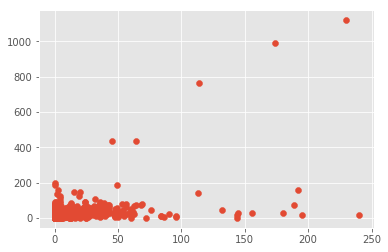

In [72]:
#誤差分布
plt.scatter(test_y, y_pred_on_test)

In [73]:
#誤差ヒスト
error_rate = (test_y - y_pred_on_test) / test_y
error_rate
#plt.hist(error_rate)
#print('Mean: ', np.mean(error_rate))
#print('Std: ', np.std(error_rate))

c:\users\c25351\anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


array([-inf, -inf, -inf, ..., -inf, -inf, -inf])

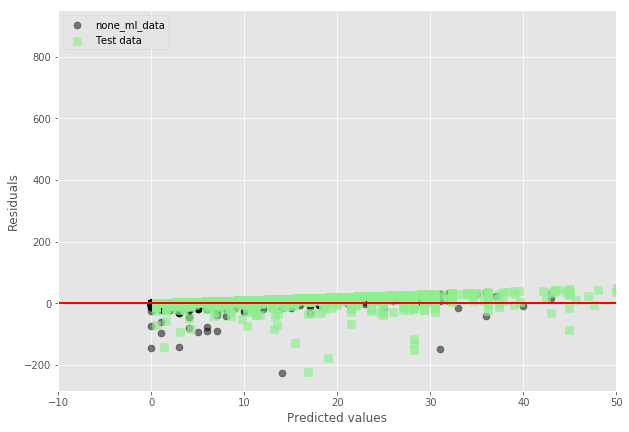

In [74]:
%matplotlib inline
plt.figure(figsize = (10, 7))
plt.scatter(none_ml_pred, none_ml_pred - none_ml_test, c = 'black', marker = 'o', s = 50, alpha = 0.5, label = 'none_ml_data')
plt.scatter(y_pred_on_test, y_pred_on_test - test_y, c = 'lightgreen', marker = 's', s = 50, alpha = 0.7, label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.show()

In [75]:
#####予測日に出荷があるかどうか（1/0）を確認し、1と予測されたものについて数量を予測する方法を検討

In [76]:
dataF10 = pd.pivot_table(dataF, index = "StockCode", columns= "date2", values = "Country", aggfunc= pd.Series.nunique ).fillna(0)

In [77]:
dataF10["b1_train_date_10"] = dataF10[b1_train_date].apply(lambda x : 1 if x > 0 else 0)
dataF10["train_date_10"] = dataF10[train_date].apply(lambda x : 1 if x > 0 else 0)
dataF10["test_date_10"] = dataF10[test_date].apply(lambda x : 1 if x > 0 else 0)
dataF10= dataF10.drop(["AMAZONFEE","B","BANK CHARGES","C2","DCGS0003","DCGS0004",\
                                     "DCGS0069","DCGS0070",\
                                     "DCGS0076","DCGSSBOY","DCGSSGIRL","DOT","M","PADS","POST","S","gift_0001_10","gift_0001_20",\
                                     "gift_0001_30","gift_0001_40","gift_0001_50","m"], axis=0)

In [78]:
train_date

'2011/12/08'

In [79]:
dataF10

date2,2010/12/01,2010/12/02,2010/12/03,2010/12/05,2010/12/06,2010/12/07,2010/12/08,2010/12/09,2010/12/10,2010/12/12,...,2011/12/02,2011/12/04,2011/12/05,2011/12/06,2011/12/07,2011/12/08,2011/12/09,b1_train_date_10,train_date_10,test_date_10
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
10080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
10120,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0
10123C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
10124A,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90214U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0
90214V,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0
90214W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0


In [80]:
train10 = train.drop(["target"],axis = 1)
train10["target"] = dataF10["train_date_10"]
train10

date2,b_Qu_3d,b_Qu_1w,b_Qu_2w,b_Qu_1m,b_Qu_1y,b_Li_3d,b_Li_1w,b_Li_2w,b_Li_1m,b_Li_1Y,...,b_Co_1w,b_Co_2w,b_Co_1m,b_Co_1Y,b_qu_1d,b_qu_1y_test,b_qu_1y_train,b_qu_1y_b1,b_qu_1y_b2,target
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,0.0,0.0,0.0,0.0,103.0,0.0,0.0,0.0,0.0,12.0,...,0.0,0.0,0.0,7.0,0.0,44.0,13.0,8.0,25.0,0
10080,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10120,6.0,10.0,4.0,7.0,3.0,1.0,2.0,1.0,2.0,2.0,...,2.0,1.0,2.0,1.0,0.0,0.0,12.0,0.0,0.0,0
10123C,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
10124A,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90214U,12.0,12.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
90214V,12.0,12.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,2.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0
90214W,12.0,12.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [81]:
test10 = test.drop(["target"],axis = 1)
test10["target"] = dataF10["test_date_10"]
test10

date2,b_Qu_3d,b_Qu_1w,b_Qu_2w,b_Qu_1m,b_Qu_1y,b_Li_3d,b_Li_1w,b_Li_2w,b_Li_1m,b_Li_1y,...,b_Co_1w,b_Co_2w,b_Co_1m,b_Co_1y,b_qu_1d,b_qu_1y_test,b_qu_1y_train,b_qu_1y_b1,b_qu_1y_b2,target
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,12.0,...,0.0,0.0,0.0,6.0,0.0,44.0,13.0,8.0,25.0,0
10080,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10120,0.0,6.0,4.0,7.0,15.0,0.0,1.0,1.0,2.0,3.0,...,1.0,1.0,2.0,2.0,0.0,0.0,12.0,0.0,0.0,0
10123C,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
10124A,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90214U,12.0,12.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
90214V,12.0,12.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
90214W,12.0,12.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [82]:
target_col = "target"
exclude_cols = ["target"]
feature_cols = [col for col in train10.columns if col not in exclude_cols]

In [83]:
y = np.array(train10[target_col])
X = np.array(train10[feature_cols])

In [84]:
X_train1, X_train2, y_train1, y_train2 = \
 train_test_split(X, y, test_size=0.3, random_state=1234)

In [85]:
# Accuracy, Precision/Recall/F-score/Support, Confusion Matrix を表示
def show_evaluation_metrics(y_true, y_pred):
    print("Accuracy:")
    print(accuracy_score(y_true, y_pred))
    print()
    
    print("Report:")
    print(classification_report(y_true, y_pred))
    
    print("Confusion matrix:")
    print(confusion_matrix(y_true, y_pred))

In [86]:
################当日の1/0をロジスティック回帰する########
#ロジスティック回帰の定義
clf_lr = LogisticRegression(n_jobs=-1)
clf_lr.fit(X_train1, y_train1)
y_test_pred_lo_tr = clf_lr.predict(X_train2)
show_evaluation_metrics(y_train2, y_test_pred_lo_tr)

c:\users\c25351\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


Accuracy:
0.8401709401709402

Report:
             precision    recall  f1-score   support

          0       0.84      0.87      0.86       650
          1       0.84      0.80      0.82       520

avg / total       0.84      0.84      0.84      1170

Confusion matrix:
[[568  82]
 [105 415]]


In [87]:
### SVM (線形カーネル)
clf_svc = LinearSVC()
clf_svc.fit(X_train1, y_train1)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [88]:
y_test_pred = clf_svc.predict(X_train2)
show_evaluation_metrics(y_train2, y_test_pred)

Accuracy:
0.8358974358974359

Report:
             precision    recall  f1-score   support

          0       0.85      0.86      0.85       650
          1       0.82      0.81      0.81       520

avg / total       0.84      0.84      0.84      1170

Confusion matrix:
[[557  93]
 [ 99 421]]


In [89]:
### Random Forest
clf_rf = RandomForestClassifier(n_estimators=50, n_jobs=-1)
clf_rf.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [90]:
y_test_pred = clf_rf.predict(X_train2)
show_evaluation_metrics(y_train2, y_test_pred)

Accuracy:
0.8427350427350427

Report:
             precision    recall  f1-score   support

          0       0.84      0.88      0.86       650
          1       0.84      0.80      0.82       520

avg / total       0.84      0.84      0.84      1170

Confusion matrix:
[[572  78]
 [106 414]]


In [91]:
#####testに適用

In [92]:
target_col = "target"
exclude_cols = ["target"]
feature_cols = [col for col in test10.columns if col not in exclude_cols]

In [93]:
y = np.array(test10[target_col])
X = np.array(test10[feature_cols])

In [94]:
y_test_pred_lo_te = clf_lr.predict(X)
show_evaluation_metrics(y, y_test_pred_lo_te)

Accuracy:
0.7684021543985637

Report:
             precision    recall  f1-score   support

          0       0.93      0.73      0.82      2820
          1       0.55      0.86      0.67      1079

avg / total       0.83      0.77      0.78      3899

Confusion matrix:
[[2066  754]
 [ 149  930]]


In [95]:
### SVM (線形カーネル)
y_test_pred = clf_svc.predict(X)
show_evaluation_metrics(y, y_test_pred)

Accuracy:
0.7517312131315722

Report:
             precision    recall  f1-score   support

          0       0.93      0.71      0.80      2820
          1       0.53      0.87      0.66      1079

avg / total       0.82      0.75      0.76      3899

Confusion matrix:
[[1996  824]
 [ 144  935]]


In [96]:
### Random Forest
y_test_pred = clf_rf.predict(X)
show_evaluation_metrics(y, y_test_pred)

Accuracy:
0.7776352911002822

Report:
             precision    recall  f1-score   support

          0       0.93      0.75      0.83      2820
          1       0.57      0.84      0.68      1079

avg / total       0.83      0.78      0.79      3899

Confusion matrix:
[[2123  697]
 [ 170  909]]


In [97]:
#y_test_pred_lo_te_01 = pd.DataFrame(data = y_test_pred_lo_te)

In [98]:
#test["10predict"] = y_test_pred_lo_te_01
#test
#test.to_csv("test.csv")

In [99]:
test_target_col = "target"
test_exclude_cols = ["target"]
test_feature_cols = [col for col in test.columns if col not in test_exclude_cols]
#test_feature_cols = ["b_Li_1w","b_Co_2w"]

In [100]:
test_y = np.array(test[test_target_col])
test_X = np.array(test[test_feature_cols])

In [101]:
lo_te = y_pred_on_test * y_test_pred_lo_te

In [102]:
y_pred_on_test = rf.predict(test_X)
rf_mse = mean_squared_error(test_y, lo_te)
print('RandomForest RMSE: ', np.sqrt(rf_mse))

RandomForest RMSE:  28.43949471066496


In [103]:
y_pred_on_test

array([2.47180449, 0.52878461, 1.51828801, ..., 2.32356564, 5.84061489,
       2.32356564])

In [104]:
y_test_pred_lo_te

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
y_pred_on_test * y_test_pred_lo_te

array([0., 0., 0., ..., 0., 0., 0.])

In [106]:
summary= pd.DataFrame(y_pred_on_test)


In [107]:
summary

,0
0,2.471804
1,0.528785
2,1.518288
3,0.528785
4,0.528785
...,...
3894,2.323566
3895,2.323566
3896,2.323566
3897,5.840615


In [108]:
#summary = dataF_quantity.drop(dataF_quantity.loc[:,"2010/12/01":"before_1month_test"], axis= 1)
summary["y_pred_on_test"] = pd.DataFrame(y_pred_on_test)
summary["y_pred_on_test_lo_te"] = pd.DataFrame(y_test_pred_lo_te)
summary["lo_te"] = pd.DataFrame(lo_te)
summary["test"] = pd.DataFrame(test_y)
summary["non_ml_pred"] = pd.DataFrame(none_ml_pred)

summary.to_csv("summary_.csv")
summary


,0,y_pred_on_test,y_pred_on_test_lo_te,lo_te,test,non_ml_pred
0,2.471804,2.471804,0,0.0,0.0,0.0
1,0.528785,0.528785,0,0.0,0.0,0.0
2,1.518288,1.518288,0,0.0,0.0,1.0
3,0.528785,0.528785,0,0.0,0.0,0.0
4,0.528785,0.528785,0,0.0,0.0,0.0
...,...,...,...,...,...,...
3894,2.323566,2.323566,0,0.0,0.0,2.0
3895,2.323566,2.323566,0,0.0,0.0,2.0
3896,2.323566,2.323566,0,0.0,0.0,2.0
3897,5.840615,5.840615,0,0.0,0.0,9.0


In [109]:
###NONE_ML 10判定

In [110]:
none_ml["mean_precision2"] = none_ml_train.mean(axis = 1).apply(lambda x:(x*2+1)//2).apply(lambda x : 1 if x > 0 else 0)
none_ml_pred2 = np.array(none_ml["mean_precision2"])

In [111]:
show_evaluation_metrics(y, none_ml_pred2)

Accuracy:
0.7091561938958707

Report:
             precision    recall  f1-score   support

          0       0.94      0.64      0.76      2820
          1       0.49      0.89      0.63      1079

avg / total       0.81      0.71      0.72      3899

Confusion matrix:
[[1801 1019]
 [ 115  964]]


In [112]:
none_ml["precision3"] = none_ml_train[train_date].apply(lambda x:(x*2+1)//2).apply(lambda x : 1 if x > 0 else 0)
none_ml_pred3 = np.array(none_ml["precision3"])

In [113]:
show_evaluation_metrics(y, none_ml_pred3)

Accuracy:
0.7671197743011029

Report:
             precision    recall  f1-score   support

          0       0.93      0.74      0.82      2820
          1       0.55      0.85      0.67      1079

avg / total       0.82      0.77      0.78      3899

Confusion matrix:
[[2075  745]
 [ 163  916]]


In [114]:
###

In [115]:
#train B1 定義
#trainb1= dataF_quantity.drop(dataF_quantity.loc[:,"2010/12/01":"before_1Year_test"], axis= 1)

In [116]:
train_1 = dataF_quantity.loc[:,"2011/11/02":train_date].drop(train_date,axis=1)
train_1["target"] = dataF_quantity[train_date]
train_1

date2,2011/11/02,2011/11/03,2011/11/04,2011/11/06,2011/11/07,2011/11/08,2011/11/09,2011/11/10,2011/11/11,2011/11/13,...,2011/11/28,2011/11/29,2011/11/30,2011/12/01,2011/12/02,2011/12/04,2011/12/05,2011/12/06,2011/12/07,target
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10080,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10120,1.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
10123C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10124A,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90214U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
90214V,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
90214W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0


In [117]:
test_1 = dataF_quantity.loc[:,"2011/11/03":test_date].drop(test_date,axis=1)
test_1["target"] = dataF_quantity[test_date]
test_1

date2,2011/11/03,2011/11/04,2011/11/06,2011/11/07,2011/11/08,2011/11/09,2011/11/10,2011/11/11,2011/11/13,2011/11/14,...,2011/11/29,2011/11/30,2011/12/01,2011/12/02,2011/12/04,2011/12/05,2011/12/06,2011/12/07,2011/12/08,target
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10120,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
10123C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10124A,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90214U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0
90214V,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0
90214W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0


In [118]:
####Train#######
### target設定。
target_col = "target"
exclude_cols = ["target"]
feature_cols = [col for col in train_1.columns if col not in exclude_cols]

y = np.array(train_1[target_col])
X = np.array(train_1[feature_cols])

X_train1, X_train2, y_train1, y_train2 = \
 train_test_split(X, y, test_size=0.3, random_state=1234)

rf = RandomForestRegressor(random_state=1234)
rf.fit(X_train1, y_train1)
y_pred2 = rf.predict(X_train2)
rf_mse = mean_squared_error(y_train2, y_pred2)
print('Random Forest RMSE: ', np.sqrt(rf_mse))

Random Forest RMSE:  35.72046806523601


In [119]:
test_target_col = "target"
test_exclude_cols = ["target"]
test_feature_cols = [col for col in test_1.columns if col not in test_exclude_cols]
#test_feature_cols = ["b_Li_1w","b_Co_2w"]

test_y = np.array(test_1[test_target_col])
test_X = np.array(test_1[test_feature_cols])

y_pred_on_test = rf.predict(test_X)
rf_mse = mean_squared_error(test_y, y_pred_on_test)
print('RandomForest RMSE: ', np.sqrt(rf_mse))

RandomForest RMSE:  48.60221930878758


In [120]:
##テストcsv吐き出し
#test_df = main_df.ix[0:1000]
#test_df.shape
#test_df.to_csv("some.csv")
#train[t_col].to_csv("train_target.csv")
#train["target"].to_csv("Atrain_target.csv")

In [121]:
#y_pred2.to_csv("y_pred2.csv")
np.savetxt("test_main.csv",test_y,delimiter=',')
np.savetxt("pred_main.csv",y_pred_on_test,delimiter=',')
#np.savetxt("train_target_1.csv",y_train2,delimiter=',')

#np.savetxt("y_pred2_!.csv",y_pred2,delimiter=',')
#np.savetxt("train_target_1.csv",y_train2,delimiter=',')

In [122]:
#none_ml["mean_precision"].to_csv("none_ml.csv")

In [123]:
np.savetxt("nonml_main.csv",none_ml_pred,delimiter=',')
